In [115]:
from pathlib import Path

import pandas as pd

In [116]:
biomet_dir = Path('/Users/alex/Documents/Data/FluxCourse Project/raw-data/BBNF17m/biomet')
biomet_files = [f for f in biomet_dir.glob('*.dat')]


In [117]:

# Don't use PAR, since the sensor is calibrated incorrectly. Likewise for LW data.
biomet_1 = (
    pd.read_csv(biomet_files[0], skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], na_values=['NaN', 'NAN', -9999])
    .loc[:, ['TIMESTAMP', 'AirT_17m_Avg', 'RH_17m', 'SWD_Avg']]
)

biomet_2 = (
    pd.read_csv(biomet_files[1], skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], na_values=['NaN', 'NAN', -9999])
    .loc[:, ['TIMESTAMP', 'AirT_17m_Avg', 'RH_17m', 'SWD_Avg']]
)
biomet = pd.concat([biomet_1, biomet_2]).sort_values('TIMESTAMP').reset_index(drop=True)
biomet = biomet.loc[biomet.TIMESTAMP.dt.year == 2019]

In [118]:
biomet

,TIMESTAMP,AirT_17m_Avg,RH_17m,SWD_Avg
0,2019-04-24 17:00:00,25.858710,21.19527,1.005310
1,2019-04-24 17:30:00,25.738960,20.50120,0.993314
2,2019-04-24 18:00:00,25.648690,20.66842,0.961646
3,2019-04-24 18:30:00,25.592620,21.39509,0.962337
4,2019-04-24 19:00:00,25.482500,20.69851,1.010897
...,...,...,...,...
10904,2019-12-31 21:30:00,-8.615687,63.70580,-1.036994
10905,2019-12-31 22:00:00,-8.481576,73.02617,-1.373397
10906,2019-12-31 22:30:00,-8.679508,74.70023,-1.179110
10907,2019-12-31 23:00:00,-7.891950,71.48386,-1.514838


In [119]:
# stitch into a continuous time series
time_start = biomet.loc[0, 'TIMESTAMP']
time_start
time_end = pd.to_datetime('2019-12-31 23:30')
time_index = pd.DataFrame(dict(TIMESTAMP=pd.date_range(time_start, time_end, freq='30min')))
biomet = (
    biomet.merge(time_index, on='TIMESTAMP', how='outer')
    .sort_values('TIMESTAMP')
    .set_index('TIMESTAMP')
)


array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>], dtype=object)

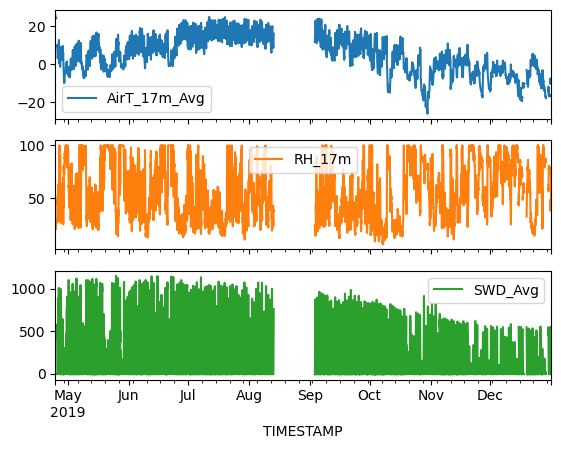

In [120]:
biomet.plot(subplots=True)

In [121]:
','.join(biomet.columns)

'AirT_17m_Avg,RH_17m,SWD_Avg'

In [122]:
# format for eddypro
biomet = (
    biomet
    .reset_index()
    .rename(
        columns={
            'TIMESTAMP':'TIMESTAMP_1',
            'AirT_17m_Avg':'Ta',
            'RH_17m':'RH',
            'SWD_Avg':'Rg',
        }
    )
)

display(biomet)

biomet_fn = '/Users/alex/Documents/Data/FluxCourse Project/raw-data/BBNF17m/biomet/biomet.csv'
with open(biomet_fn, 'w') as f:
    f.write(','.join(biomet.columns) + '\n')
    f.write(r'yyyy-mm-dd HHMM,C,%,W+1m-2' + '\n')

biomet.to_csv('/Users/alex/Documents/Data/FluxCourse Project/raw-data/BBNF17m/biomet/biomet.csv', index=False, header=False, na_rep=-9999, date_format=r"%Y-%m-%d %H%M", mode='a')

,TIMESTAMP_1,Ta,RH,Rg
0,2019-04-24 17:00:00,25.858710,21.19527,1.005310
1,2019-04-24 17:30:00,25.738960,20.50120,0.993314
2,2019-04-24 18:00:00,25.648690,20.66842,0.961646
3,2019-04-24 18:30:00,25.592620,21.39509,0.962337
4,2019-04-24 19:00:00,25.482500,20.69851,1.010897
...,...,...,...,...
12057,2019-12-31 21:30:00,-8.615687,63.70580,-1.036994
12058,2019-12-31 22:00:00,-8.481576,73.02617,-1.373397
12059,2019-12-31 22:30:00,-8.679508,74.70023,-1.179110
12060,2019-12-31 23:00:00,-7.891950,71.48386,-1.514838
